#### Exercise 1
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [41]:
#Import Pandas to allow you to work with a dataframe
import pandas as pd

#Get the filepath of the yellow taxi trip csv and read the csv
file_path = '/workspaces/student-weekly-1-ajrofe/part-2/data/2019_Yellow_Taxi_Trip_Data.csv'
data = pd.read_csv(file_path)

#Select the 4 columns from the dataframe, and descrbibe is used to calculate summary stats
summary_stats = data[['fare_amount', 'tip_amount','tolls_amount', 'total_amount']].describe()

print(summary_stats)


        fare_amount    tip_amount  tolls_amount  total_amount
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      15.106313      2.634494      0.623447     22.564659
std       13.954762      3.409800      6.437507     19.209255
min      -52.000000      0.000000     -6.120000    -65.920000
25%        7.000000      0.000000      0.000000     12.375000
50%       10.000000      2.000000      0.000000     16.300000
75%       16.000000      3.250000      0.000000     22.880000
max      176.000000     43.000000    612.000000    671.800000


#### Exercise 2
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [42]:
# data.dxmax is used to find the index of the row where trip distance is max, 
# data.loc is used to select the row corresponding to the index numbers for 4 different variables
longest_trip = data.loc[data['trip_distance'].idxmax(), ['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']]
print(longest_trip)

fare_amount      176.0
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: object


#### Exercise 3
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [43]:
# Read in the meteorite data filepath and csv
meteor_path = '/workspaces/student-weekly-1-ajrofe/part-2/data/Meteorite_Landings.csv'
meteor_data = pd.read_csv(meteor_path)

#Rename mass (g) to mass
meteor_data.rename(columns= {'mass (g)':'mass'}, inplace = True)

#Drop reclat and reclong
meteor_data.drop(columns = ['reclat','reclong'], inplace = True)

#sort by descending mass
meteor_sorted = meteor_data.sort_values(by = 'mass', ascending=False)

print(meteor_sorted)

                  name     id nametype      recclass        mass   fall  \
16392             Hoba  11890    Valid     Iron, IVB  60000000.0  Found   
5373         Cape York   5262    Valid   Iron, IIIAB  58200000.0  Found   
5365   Campo del Cielo   5247    Valid  Iron, IAB-MG  50000000.0  Found   
5370     Canyon Diablo   5257    Valid  Iron, IAB-MG  30000000.0  Found   
3455           Armanty   2335    Valid    Iron, IIIE  28000000.0  Found   
...                ...    ...      ...           ...         ...    ...   
38282   Wei-hui-fu (a)  24231    Valid          Iron         NaN  Found   
38283   Wei-hui-fu (b)  24232    Valid          Iron         NaN  Found   
38285          Weiyuan  24233    Valid  Mesosiderite         NaN  Found   
41472    Yamato 792768  28117    Valid           CM2         NaN  Found   
45698    Zapata County  30393    Valid          Iron         NaN  Found   

                         year             GeoLocation  
16392  01/01/1920 12:00:00 AM   (-19.58333,

#### Exercise 4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [44]:
# Extract the year as a substring from the year column and convert to numeric
meteor_data['year'] = pd.to_numeric(meteor_data['year'].str.slice(0,4), errors = 'coerce')

# New column to indicate if before 1970
meteor_data['before_1970'] = meteor_data['year'] < 1970

# Set index to the 'id' column
meteor_data.set_index('id', inplace = True)

# Sort the index before using loc
meteor_data.sort_index(inplace=True)

# Extract rows 10036-10040
subset = meteor_data.loc[10036:10040]
print(subset)

            name nametype         recclass      mass   fall  year  \
id                                                                  
10036     Enigma    Valid               H4      94.0  Found   NaN   
10037       Enon    Valid  Iron, ungrouped     763.0  Found   NaN   
10038      Enshi    Valid               H5    8000.0   Fell   NaN   
10039  Ensisheim    Valid              LL6  127000.0   Fell   NaN   

                 GeoLocation  before_1970  
id                                         
10036  (31.33333, -82.31667)        False  
10037     (39.86667, -83.95)        False  
10038          (30.3, 109.5)        False  
10039       (47.86667, 7.35)        False  


#### Exercise 5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [45]:
list(data.columns)

['vendorid',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'ratecodeid',
 'store_and_fwd_flag',
 'pulocationid',
 'dolocationid',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge']

In [46]:
#Convert to datetime
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

#Set tpep dropoff time as the index for resampling, inplace operator modifies the existing df, and doesnt make a new one
data.set_index('tpep_dropoff_datetime', inplace = True)

#Resample data to an hourly frequency and calculate total values
#H is to specify the frequency of resampling, hourly in this case, could also use daily(D), monthly (M), 15 minute intervals (15T)
#For each hourly group, sum the values of the specified columns. Double bracket bc multiple columns
hourly_data = data.resample('H').sum()[['trip_distance','fare_amount','tolls_amount', 'tip_amount']]

#Find the 5 hours with the most tips
top_5_hours = hourly_data.nlargest(5,'tip_amount')
print("5 Hours with the most tips")
print(top_5_hours)


5 Hours with the most tips
                       trip_distance  fare_amount  tolls_amount  tip_amount
tpep_dropoff_datetime                                                      
2019-10-23 16:00:00         10676.95     67797.76        699.04    12228.64
2019-10-23 17:00:00         16052.83     70131.91       4044.04    12044.03
2019-10-23 18:00:00          3104.56     11565.56       1454.67     1907.64
2019-10-23 15:00:00            14.34       213.50          0.00       51.75
2019-10-23 19:00:00            98.59       268.00         24.48       25.74


/tmp/ipykernel_1945/2611206187.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = data.resample('H').sum()[['trip_distance','fare_amount','tolls_amount', 'tip_amount']]


#### Exercise 6
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

#Read in the TSA data
tsa_path = '/workspaces/student-weekly-1-ajrofe/part-2/data/tsa_melted_holiday_travel.csv'
tsa_data = pd.read_csv(tsa_path)


In [54]:
list(tsa_data.columns)

['date', 'year', 'travelers', 'holiday', 'Year']

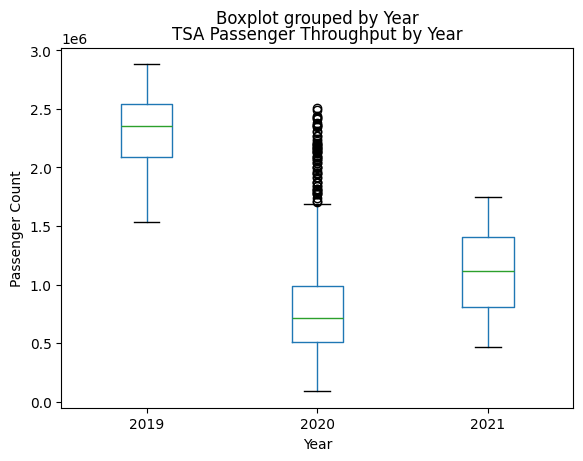

In [60]:
#Convert data column to datetime
tsa_data['date'] = pd.to_datetime(tsa_data['date'])

#Extract the year from the date column
#dt is an accessor to work with datetime objects and allows you to extract specific components (year in this case), or perform operations in a pandas series
tsa_data['Year'] = tsa_data['date'].dt.year

#Create boxplots for travel throughput by year
#Didn't use plot and kind = box because the 3 plots were on top of each other and hard to read, much nicer side by side
tsa_data.boxplot(column='travelers', by = 'Year', grid = False)

plt.title('TSA Passenger Throughput by Year')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.show()

#### Exercise 7
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

/tmp/ipykernel_1945/3027601226.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsa_data_2019['Day_of_week'] = tsa_data_2019['date'].dt.dayofweek
/tmp/ipykernel_1945/3027601226.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsa_data_2019['Month'] = tsa_data_2019['date'].dt.month


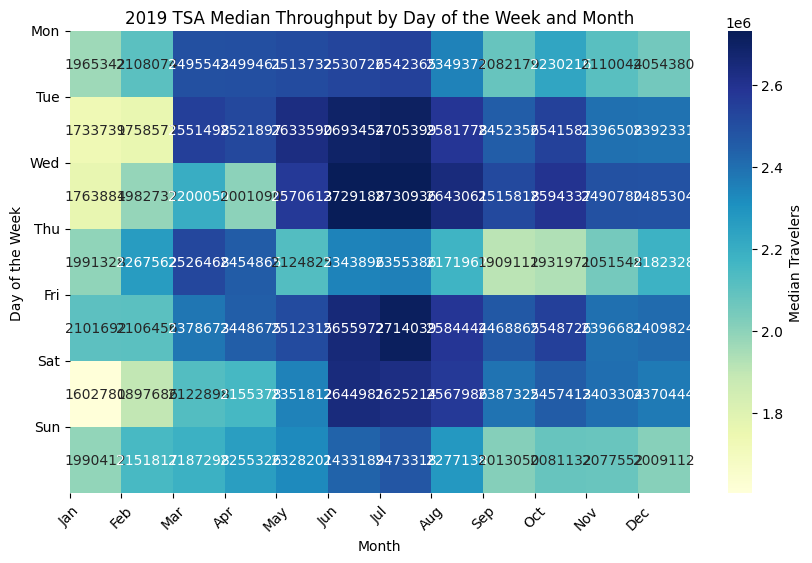

In [64]:
import seaborn as sns

#filter tsa_data where year = 2019
tsa_data_2019 = tsa_data[tsa_data['date'].dt.year == 2019]

#Extract day of the week and month using dt
tsa_data_2019['Day_of_week'] = tsa_data_2019['date'].dt.dayofweek
tsa_data_2019['Month'] = tsa_data_2019['date'].dt.month

#Calculate median throughput by day of the week and month
#From tsa_2019, groupby day of the week and month, select the travelers column, calculate the median. Unstack reshaped the resulting grouped data because 2 columns were selected in grouping
#unstacking creates a dataframe where rows represent the days of the week, columns represent months and valyes in the df are the median number of travelers for each day/month combo
median_throughput = tsa_data_2019.groupby(['Day_of_week','Month'])['travelers'].median().unstack()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(median_throughput, annot=True, cmap='YlGnBu', fmt='.0f', cbar_kws={'label': 'Median Travelers'})

# Set labels and title
plt.title('2019 TSA Median Throughput by Day of the Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.yticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

plt.show()